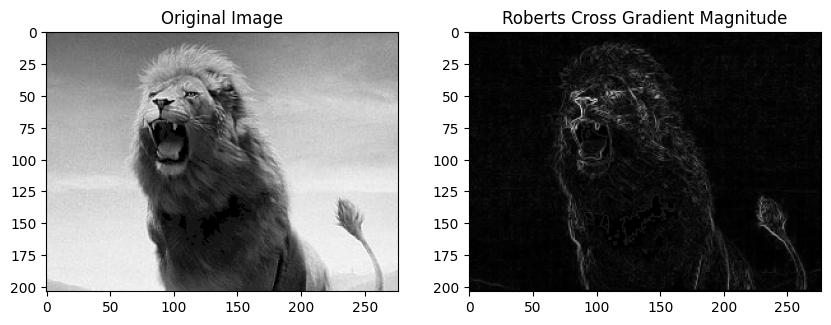

In [49]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to apply the Roberts Cross operator
def roberts_cross(image):
    # Get the dimensions of the image
    rows, cols = image.shape

    # Initialize the gradient images
    Gx = np.zeros((rows, cols))
    Gy = np.zeros((rows, cols))

    # Define the Roberts Cross kernels
    kernel_x = np.array([[1, 0], [0, -1]])
    kernel_y = np.array([[0, 1], [-1, 0]])

    # Apply the kernels to the image using manual loops
    for i in range(rows - 1):
        for j in range(cols - 1):
            Gx[i, j] = (kernel_x[0, 0] * image[i, j] +
                        kernel_x[0, 1] * image[i, j + 1] +
                        kernel_x[1, 0] * image[i + 1, j] +
                        kernel_x[1, 1] * image[i + 1, j + 1])

            Gy[i, j] = (kernel_y[0, 0] * image[i, j] +
                        kernel_y[0, 1] * image[i, j + 1] +
                        kernel_y[1, 0] * image[i + 1, j] +
                        kernel_y[1, 1] * image[i + 1, j + 1])

    # Calculate the gradient magnitude
    gradient_magnitude = np.sqrt(Gx**2 + Gy**2)

    return gradient_magnitude

# Step 1: Read and preprocess the image
image = cv2.imread('5.png', cv2.IMREAD_GRAYSCALE)

# Step 2: Apply the Roberts Cross operator
gradient_magnitude = roberts_cross(image)

# Step 3: Visualize the results
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Roberts Cross Gradient Magnitude')
plt.imshow(gradient_magnitude, cmap='gray')

plt.show()


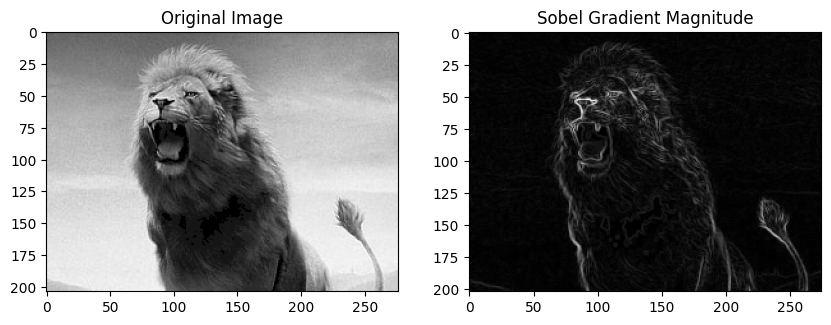

In [51]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to apply the Sobel operator for edge detection
def sobel_operator(image):
    # Get the dimensions of the image
    rows, cols = image.shape

    # Initialize the gradient images
    Gx = np.zeros((rows - 2, cols - 2))
    Gy = np.zeros((rows - 2, cols - 2))

    # Define the Sobel kernels for edge detection
    kernel_x = np.array([[-1, 0, 1],
                         [-2, 0, 2],
                         [-1, 0, 1]])

    kernel_y = np.array([[ 1,  2,  1],
                         [ 0,  0,  0],
                         [-1, -2, -1]])

    # Apply the kernels to the image using manual loops
    for i in range(rows - 2):
        for j in range(cols - 2):
            Gx[i, j] = (kernel_x[0, 0] * image[i, j] +
                        kernel_x[0, 1] * image[i, j + 1] +
                        kernel_x[0, 2] * image[i, j + 2] +
                        kernel_x[1, 0] * image[i + 1, j] +
                        kernel_x[1, 1] * image[i + 1, j + 1] +
                        kernel_x[1, 2] * image[i + 1, j + 2] +
                        kernel_x[2, 0] * image[i + 2, j] +
                        kernel_x[2, 1] * image[i + 2, j + 1] +
                        kernel_x[2, 2] * image[i + 2, j + 2])

            Gy[i, j] = (kernel_y[0, 0] * image[i, j] +
                        kernel_y[0, 1] * image[i, j + 1] +
                        kernel_y[0, 2] * image[i, j + 2] +
                        kernel_y[1, 0] * image[i + 1, j] +
                        kernel_y[1, 1] * image[i + 1, j + 1] +
                        kernel_y[1, 2] * image[i + 1, j + 2] +
                        kernel_y[2, 0] * image[i + 2, j] +
                        kernel_y[2, 1] * image[i + 2, j + 1] +
                        kernel_y[2, 2] * image[i + 2, j + 2])

    # Calculate the gradient magnitude
    gradient_magnitude = np.sqrt(Gx**2 + Gy**2)
    return gradient_magnitude

# Step 1: Read and preprocess the image
image = cv2.imread('5.png', cv2.IMREAD_GRAYSCALE)

# Step 2: Apply the Sobel operator for edge detection
gradient_magnitude = sobel_operator(image)
# Step 3: Visualize the results
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Sobel Gradient Magnitude')
plt.imshow(gradient_magnitude, cmap='gray')

plt.show()


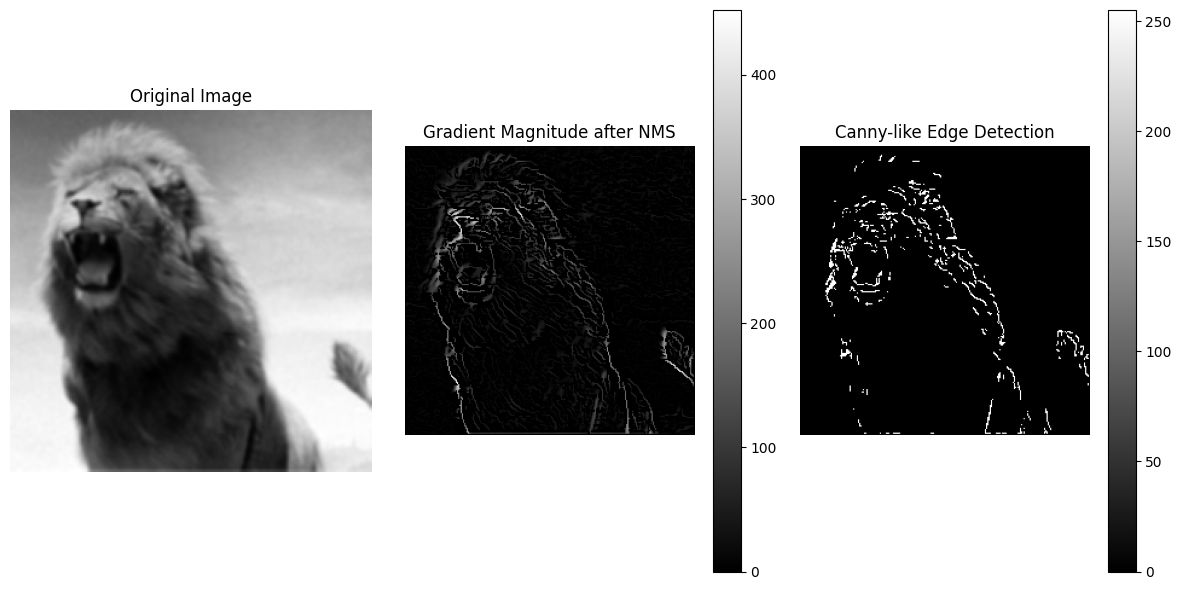

In [73]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
Image = cv2.imread("Aslan.png", 0)

# Apply Gaussian Blur
Image = cv2.GaussianBlur(Image, (5, 5), 0)

# Define the Sobel kernels for edge detection
kernel_x = np.array([[-1, 0, 1],
                     [-2, 0, 2],
                     [-1, 0, 1]])

kernel_y = np.array([[ 1,  2,  1],
                     [ 0,  0,  0],
                     [-1, -2, -1]])

# Initialize arrays for gradient magnitude and angle (theta)
gradient_magnitude = np.zeros_like(Image, dtype=np.float32)
Angle_teta = np.zeros_like(Image, dtype=np.float32)

# Apply the Sobel operator using manual loops
rows, cols = Image.shape
for i in range(rows - 2):
    for j in range(cols - 2):
        # Compute gradient in x and y directions
        Gx = np.sum(Image[i:i+3, j:j+3] * kernel_x)
        Gy = np.sum(Image[i:i+3, j:j+3] * kernel_y)

        # Calculate gradient magnitude
        gradient_magnitude[i+1, j+1] = np.sqrt(Gx**2 + Gy**2)

        # Calculate gradient direction (angle)
        if Gx != 0:
            Angle_teta[i+1, j+1] = np.arctan(Gy / Gx) * (180 / np.pi)
        else:
            Angle_teta[i+1, j+1] = 90  # Handle division by zero, set angle to 90 degrees

# Perform Non-Maximum Suppression (NMS)
nms_image = np.zeros_like(gradient_magnitude)
for i in range(1, rows - 1):
    for j in range(1, cols - 1):
        direction = Angle_teta[i, j]

        # Define the neighbor indices based on direction
        if (0 <= direction < 22.5) or (157.5 <= direction <= 180):
            neighbor1 = (i, j + 1)
            neighbor2 = (i, j - 1)
        elif (22.5 <= direction < 67.5):
            neighbor1 = (i - 1, j + 1)
            neighbor2 = (i + 1, j - 1)
        elif (67.5 <= direction < 112.5):
            neighbor1 = (i - 1, j)
            neighbor2 = (i + 1, j)
        elif (112.5 <= direction < 157.5):
            neighbor1 = (i - 1, j - 1)
            neighbor2 = (i + 1, j + 1)

        # Perform NMS
        if ((gradient_magnitude[i, j] >= gradient_magnitude[neighbor1]) and
           (gradient_magnitude[i, j] >= gradient_magnitude[neighbor2])):
            nms_image[i, j] = gradient_magnitude[i, j]
        else:
            nms_image[i, j] = 0

# Define lower and higher thresholds for Canny-like edge detection
lower_threshold = 100
higher_threshold = 200

# Apply thresholding to simulate Canny edge detection
canny_image = np.zeros_like(nms_image)
canny_image[(nms_image > lower_threshold) & (nms_image < higher_threshold)] = 255

# Display the results
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(Image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(nms_image, cmap='gray')
plt.title('Gradient Magnitude after NMS')
plt.colorbar()
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(canny_image, cmap='gray')
plt.title('Canny-like Edge Detection')
plt.colorbar()
plt.axis('off')

plt.tight_layout()
plt.show()


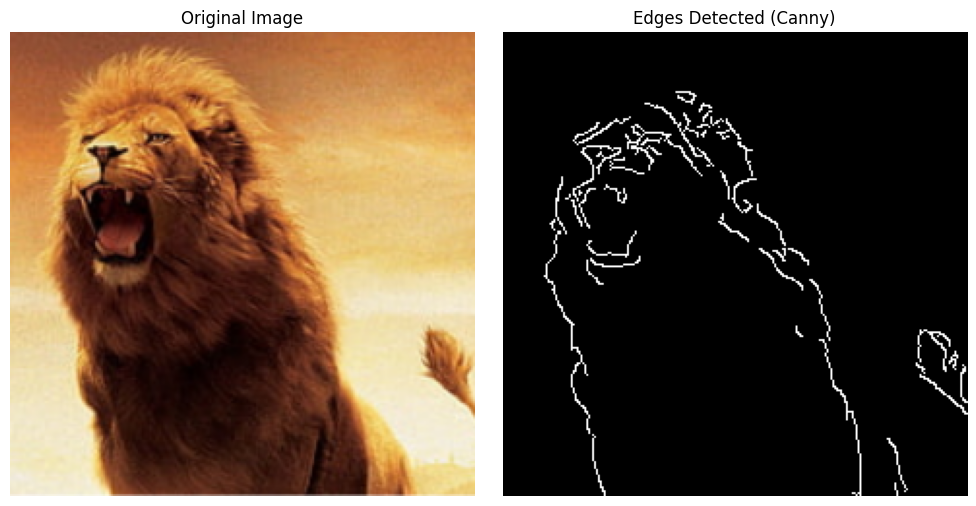

In [70]:
import cv2
import matplotlib.pyplot as plt

# Step 1: Read the image
image = cv2.imread('Aslan.png')

# Step 2: Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Step 3: Apply Gaussian blur (optional but recommended)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Step 4: Apply Canny edge detection
edges = cv2.Canny(blurred, threshold1=100, threshold2=200)  # Adjust thresholds as needed

# Step 5: Display the result
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Edges Detected (Canny)')
plt.axis('off')

plt.tight_layout()
plt.show()